In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
import os
os.getcwd()

'c:\\Ella-Liza\\ing dev\\ML-AI-Data Science\\ml journey\\notebooks\\experiments'

In [5]:
mydata = pd.read_csv("../../datasets/area_vs_price.csv")

In [6]:
mydata.head()


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [22]:

reg = LinearRegression()
reg.fit(mydata[['area']], mydata.price)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
reg.predict([[3300]])



c:\Ella-Liza\ing dev\ML-AI-Data Science\ml journey\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [25]:
reg.coef_

array([135.78767123])

In [26]:
reg.intercept_

np.float64(180616.43835616432)

In [27]:
dataset2 = pd.read_csv("../../datasets/1.01. Simple linear regression.csv")
dataset2.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [34]:
model = LinearRegression()
model.fit(dataset2[['GPA']], dataset2['SAT'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
model.predict([[2.83]])

c:\Ella-Liza\ing dev\ML-AI-Data Science\ml journey\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1722.6066048])

c:\Ella-Liza\ing dev\ML-AI-Data Science\ml journey\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Ella-Liza\ing dev\ML-AI-Data Science\ml journey\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


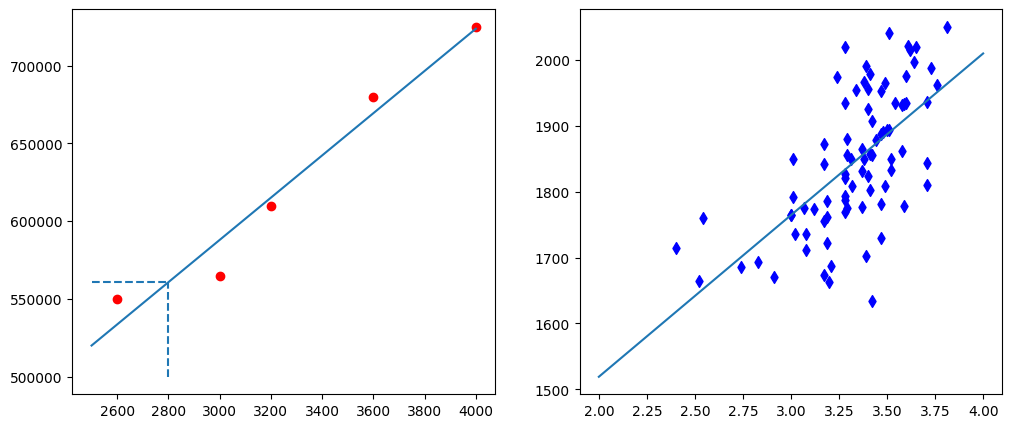

In [54]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax1.scatter(mydata['area'], mydata['price'], color='red', marker='o')
ax2.scatter(dataset2['GPA'], dataset2['SAT'], color='blue', marker='d')

x2 = np.linspace(2, 4, 25)
y2 = (model.intercept_ + model.coef_ * x2)

ax2.plot(x2, y2)

x = np.linspace(2500, 4000, 20)
y = reg.intercept_ + reg.coef_ * x

ax1.plot(x, y)
ax1.vlines(x=2800, ymin=500000, ymax=reg.predict([[2800]]), linestyle="--")
ax1.hlines(xmin=2500, y=reg.predict([[2800]]), xmax=2800, linestyle="--")


NB: To find the value of a point on the line:
`np.interp(x_value, x, y)`

In [44]:
predict_values = np.array([2800, 3100, 3400, 3800])

reg.predict(pd.DataFrame(predict_values))

c:\Ella-Liza\ing dev\ML-AI-Data Science\ml journey\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([560821.91780822, 601558.21917808, 642294.52054795, 696609.5890411 ])

In [58]:
new_df = pd.DataFrame(predict_values, columns=['area'])
new_df['prices'] = reg.predict(new_df)
new_df

,area,prices
0,2800,560821.917808
1,3100,601558.219178
2,3400,642294.520548
3,3800,696609.589041


In [60]:
# exporting the new dataframe
new_df.to_csv("../../datasets/predicted_data.csv", index=False)